## Questionamentos a serem levantados (1 etapa)

ordenamento de dataset e importante para analise?

Quais as hipoteses possiveis?

Quais as colunas sao desnecessarias?

Tratamento de outliers e valores NaN


#### Agrupar os bairros pela zona do SP. (criar nova coluna)

Centro Ampliado-  Sé, Bela Vista, Bom Retiro, 
Cambuci, Consolação, Liberdade, República , Santa Cecília, Pinheiros, Alto de Pinheiros, Itaim 
Bibi, Jardim Paulista, Lapa, Perdizes, Vila Leopoldina, 
Jaguaré, Jaguara, Barra Funda, Butantã, Morumbi, Raposo 
Tavares, Rio Pequeno, Vila Sônia, Vila Mariana, Saúde, Moema, 
Ipiranga, Cursino, Sacomã, Jabaquara, Campo Belo.

Sul -  Cidade Ademar, Pedreira, Campo Limpo, 
Capão Redondo, Vila Andrade, Jardim Ângela, Jardim São Luís, 
Socorro, Cidade Dutra, Grajaú, Parelheiros, Marsilac , Santo 
Amaro e Campo Grande.

Norte - Tremembé, Jaçanã, Vila Maria, Vila 
Guilherme, Vila Medeiros, Santana, Tucuruvi, Mandaqui, Casa 
Verde, Limão, Cachoeirinha, Freguesia do Ó, Brasilândia, 
Pirituba, Jaraguá, São Domingos, Perus e Anhanguera.

Leste 1 -  Mooca, Água Rasa, Belém, Brás, Pari, 
Tatuapé, Vila Prudente, Sapopemba, São Lucas, Aricanduva, 
Carrão, Vila Formosa, Penha, Artur Alvim, Cangaíba e Vila 
Matilde.

Leste 2 -  Ermelino Matarazzo, Ponte Rasa, 
Itaquera, Cidade Líder, José Bonifácio, Parque do Carmo, São 
Mateus, Iguatemi, São Rafael, São Miguel, Jardim Helena, Vila 
Jacuí, Itaim Paulista, Vila Curuçá, Guaianases, Lajeado e Cidade 
Tiradentes.



1 hipotese: A localizacao importa para o aluguel a m^2 or valor total a m^2.  
e se sim, qual e a variacao. listar de ordem decrescente e criar o grafico para visualizacao

2 hipotese: O tipo de imovel influencia no valor total a m^2  (restringir/limitar pela zona). 

3 hipotese: Que tipo de imovel esta mais concentrado em cada zona. Centro possui mais apartamentos. 


In [24]:
import pandas as pd
import numpy as np

In [7]:
data=pd.read_csv("data.csv", sep=",")
data.head


<bound method NDFrame.head of                                address                 district  area  \
0                           Rua Herval               Belenzinho    21   
1                   Avenida São Miguel             Vila Marieta    15   
2                     Rua Oscar Freire                Pinheiros    18   
3                     Rua Júlio Sayago                  Vila Ré    56   
4                   Rua Barata Ribeiro               Bela Vista    19   
...                                ...                      ...   ...   
11652          Avenida Adolfo Pinheiro              Santo Amaro    94   
11653  Rua Professor Alexandre Correia     Jardim Vitória Régia   350   
11654                 Rua Abílio Borin         Jardim Caravelas    84   
11655                Rua Forte William  Jardim Fonte do Morumbi    76   
11656              Rua Alexandre Dumas              Santo Amaro   110   

       bedrooms  garage                type   rent  total  
0             1       0     Studi

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11657 non-null  object
 1   district  11657 non-null  object
 2   area      11657 non-null  int64 
 3   bedrooms  11657 non-null  int64 
 4   garage    11657 non-null  int64 
 5   type      11657 non-null  object
 6   rent      11657 non-null  int64 
 7   total     11657 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 728.7+ KB


## Verificar se existe dados vazios

In [32]:
data.isnull().sum()

address     0
district    0
area        0
bedrooms    0
garage      0
type        0
rent        0
total       0
dtype: int64

## Verificando a existencia de outliers

In [33]:
data.describe()

,area,bedrooms,garage,rent,total
count,11657.000000,11657.000000,11657.000000,11657.000000,11657.000000
mean,84.655658,1.966286,1.060393,3250.814789,4080.030625
std,74.020536,0.931313,1.132349,2650.711557,3352.480274
min,0.000000,0.000000,0.000000,500.000000,509.000000
25%,40.000000,1.000000,0.000000,1590.000000,1996.000000
50%,60.000000,2.000000,1.000000,2415.000000,3057.000000
75%,96.000000,3.000000,2.000000,3800.000000,4774.000000
max,580.000000,6.000000,6.000000,25000.000000,28700.000000


<Axes: >

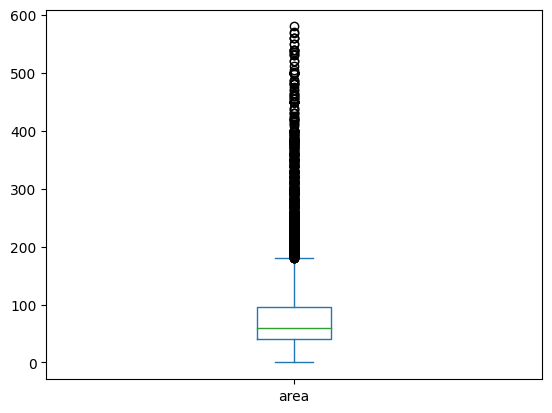

In [34]:
# Na coluna area
data.area.plot.box()

In [35]:
data= data.sort_values(by='area')
print(data.head(20))

                               address                district  area  \
7085             Rua Edmundo de Amicis                 Morumbi     0   
2983                      Rua Relíquia  Jardim das Laranjeiras     0   
9898      Rua Visconde de Porto Seguro      Jardim dos Estados     1   
962              Rua Engenheiro Bianor                 Butantã     1   
5323               Rua Solidônio Leite              Vila Ivone     2   
11055          Travessa Santa Filomena       Vila Campo Grande     4   
1223                      Rua Mussumés         Vila Maria Alta     5   
2636                 Rua das Palmeiras            Vila Buarque    10   
4735            Rua Valentim Magalhães               Água Rasa    10   
7582            Rua Conselheiro Nébias          Campos Elíseos    10   
8856            Rua Valentim Magalhães               Água Rasa    10   
5588     Rua Manoel Pereira dos Santos                  Taboão    10   
3403                 Rua das Palmeiras          Campos Elíseos  

In [36]:
# Nao fazem sentido ter um imovel com area 0 , 1 ,2 5 m^2
#Remover as primieras 7 linhas
data.drop(index=data.index[:7], inplace=True)
print(data)


                             address                   district  area  \
2636               Rua das Palmeiras               Vila Buarque    10   
4735          Rua Valentim Magalhães                  Água Rasa    10   
7582          Rua Conselheiro Nébias             Campos Elíseos    10   
8856          Rua Valentim Magalhães                  Água Rasa    10   
5588   Rua Manoel Pereira dos Santos                     Taboão    10   
...                              ...                        ...   ...   
11581              Alameda Dinamarca  Alphaville Residencial Um   560   
10237           Avenida Praia Grande             City Bussocaba   560   
9383            Avenida José Galante                Vila Suzana   568   
8553             Rua Tobias Monteiro                 Campo Belo   570   
11249                   Rua Itatinga                   Pacaembu   580   

       bedrooms  garage                type   rent  total  
2636          1       0     Studio e kitnet   1720   2136  
473

<Axes: >

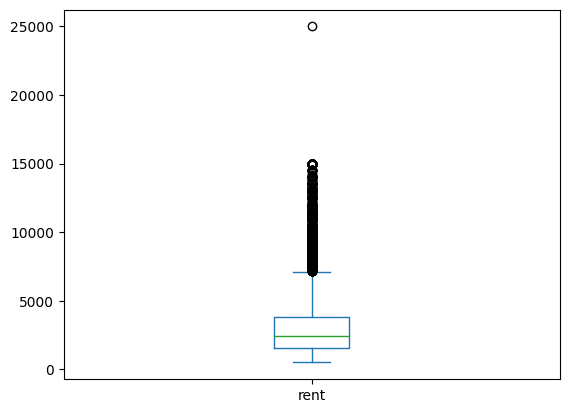

In [37]:
#Na coluna de alugel

data.rent.plot.box()

In [38]:
# Filitrando esse valor
data= data.sort_values(by='rent', ascending=False)
print(data.head(20))

                              address             district  area  bedrooms  \
6095                 Avenida Chibarás    Planalto Paulista    24         1   
8036      Rua Doutor Albuquerque Lins        Santa Cecília   202         3   
11223            Rua Convenção de Itu      Jardim Paulista   260         3   
11229                 Rua Bela Cintra           Consolação   220         3   
9933   Rua Ministro Coriolano de Góis     Jardim Marajoara   400         6   
9049                 Rua Conde Prates      Parque da Mooca   400         4   
6099                Rua Bueno Brandão  Vila Nova Conceição   167         2   
10140                    Rua Guapiaçu      Vila Clementino   400         4   
10263                     Rua Berlioz    Alto de Pinheiros   400         5   
11591  Rua Leonardo Cerveira Varandas   Paraíso do Morumbi   300         3   
9801                      Rua Tangará         Vila Mariana   220         2   
9951         Rua Joaquim José Esteves          Santo Amaro   338

In [39]:
# Encontrar o índice da linha que contém o valor máximo na coluna 'rent'
indice_max_rent = data['rent'].idxmax()

# Remover a linha que contém o valor máximo na coluna 'rent'
data = data.drop(index=indice_max_rent)

print(data)


                              address                  district  area  \
8036      Rua Doutor Albuquerque Lins             Santa Cecília   202   
11223            Rua Convenção de Itu           Jardim Paulista   260   
11229                 Rua Bela Cintra                Consolação   220   
9933   Rua Ministro Coriolano de Góis          Jardim Marajoara   400   
9049                 Rua Conde Prates           Parque da Mooca   400   
...                               ...                       ...   ...   
7420        Rua Manuel José Rodrigues                    Sacoma    20   
5901        Rua Manuel José Rodrigues                    Sacoma    40   
1188            Viela Renaldo Laporta  Vila Aurora (zona Norte)    30   
4741    Rua Manoel Oliveira Gonçalves             Jardim Jaçanã    30   
51                   Rua Tanque Velho                 Vila Nivi    45   

       bedrooms  garage         type   rent  total  
8036          3       3  Apartamento  15000  19830  
11223         3  

<Axes: >

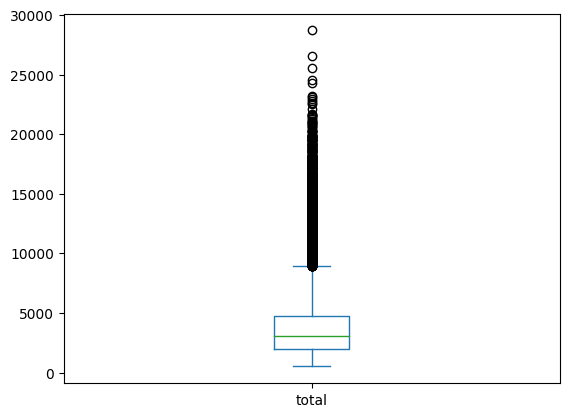

In [40]:
# Na coluna total
data.total.plot.box()

In [41]:
data= data.sort_values(by='total', ascending=False)
print(data.head(20))

                              address                 district  area  \
10144         Alameda dos Tupiniquins        Planalto Paulista   454   
9950         Rua Joaquim José Esteves              Santo Amaro   329   
10093                       Rua Edson               Campo Belo   311   
9951         Rua Joaquim José Esteves              Santo Amaro   338   
9948         Rua Joaquim José Esteves              Santo Amaro   329   
11603            Rua Domênico Perotti  Jardim Fonte do Morumbi   280   
9804                Rua Sampaio Viana                  Paraíso   240   
11178  Alameda Ministro Rocha Azevedo          Jardim Paulista   272   
8767                     Rua Cataguaz           Vila Congonhas   328   
8765                     Rua Paiaguás           Vila Congonhas   217   
11333  Alameda Ministro Rocha Azevedo          Jardim Paulista   180   
9794       Rua Doutor Tomás Carvalhal                  Paraíso   300   
11154                 Rua Bela Cintra               Consolação  

## Tratar outliers no caso de multivariaveis.

In [42]:
from pyod.models.knn import KNN
data.head(1)



,address,district,area,bedrooms,garage,type,rent,total
10144,Alameda dos Tupiniquins,Planalto Paulista,454,4,5,Apartamento,15000,28700


In [43]:
detector= KNN()
detector.fit(data.iloc[:,[2,3,4,6,7]])

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [44]:
previsoes=detector.labels_
previsoes

array([1, 1, 1, ..., 0, 0, 0])

In [45]:
np.unique(previsoes,return_counts=True)

(array([0, 1]), array([10484,  1165], dtype=int64))

In [47]:
outliers=[]
for i in range(len(previsoes)):
    if previsoes[i]==1:
        outliers.append(i)
print(outliers)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 49, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 138, 142, 144, 145, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238,

In [48]:
lista_outliers=data.iloc[outliers,:]
lista_outliers

,address,district,area,bedrooms,garage,type,rent,total
10144,Alameda dos Tupiniquins,Planalto Paulista,454,4,5,Apartamento,15000,28700
9950,Rua Joaquim José Esteves,Santo Amaro,329,4,3,Apartamento,15000,26550
10093,Rua Edson,Campo Belo,311,4,6,Apartamento,15000,25510
9951,Rua Joaquim José Esteves,Santo Amaro,338,4,3,Apartamento,15000,24540
9948,Rua Joaquim José Esteves,Santo Amaro,329,4,4,Apartamento,15000,24270
...,...,...,...,...,...,...,...,...
6448,Rua Francisco Tapajós,Vila Santo Estéfano,60,2,1,Apartamento,1800,3564
474,Rua Vigário Taques Bitencourt,Santo Amaro,350,3,4,Casa,3200,3378
8536,Rua Ugo Taddei,Parque Jabaquara,250,4,3,Casa,2125,2894
10749,Rua Solimões,Barra Funda,300,3,0,Casa,2550,2859


In [15]:

bairros= data['district'].unique()
print(bairros)
print(len(bairros))
print(type(bairros))


['Planalto Paulista' 'Santo Amaro' 'Campo Belo' ... 'Jardim Inga'
 'Jardim Maraba' 'Jardim Jaçanã']
1199
<class 'numpy.ndarray'>


## Criando duas colunas no DataFrame

In [10]:

data['aluguel/area']=round(data['rent']/ data['area'],2)
data['total/area']=round(data['total']/data['area'],2)

data.head

<bound method NDFrame.head of                                address                 district  area  \
0                           Rua Herval               Belenzinho    21   
1                   Avenida São Miguel             Vila Marieta    15   
2                     Rua Oscar Freire                Pinheiros    18   
3                     Rua Júlio Sayago                  Vila Ré    56   
4                   Rua Barata Ribeiro               Bela Vista    19   
...                                ...                      ...   ...   
11652          Avenida Adolfo Pinheiro              Santo Amaro    94   
11653  Rua Professor Alexandre Correia     Jardim Vitória Régia   350   
11654                 Rua Abílio Borin         Jardim Caravelas    84   
11655                Rua Forte William  Jardim Fonte do Morumbi    76   
11656              Rua Alexandre Dumas              Santo Amaro   110   

       bedrooms  garage                type   rent  total regiao  \
0             1       0  

## Separando os bairros por região

In [32]:
import pandas as pd

Mapeamento_por_zona = {
    'Aclimação': 'Centro Ampliado',
    'Adalgisa': 'Centro Ampliado',
    'Água Branca': 'Centro Ampliado',
    'Água Fria': 'Norte',
    'Água Funda': 'Centro Ampliado',
    'Água Rasa': 'Leste 1',
    'Alto da Boa Vista': 'Sul',
    'Alto da Lapa': 'Centro Ampliado',
    'Alto da Mooca': 'Leste 1',
    'Alto de Pinheiros': 'Centro Ampliado',
    'Alto do Pari': 'Leste 1',
    'Americanópolis': 'Sul',
    'Aricanduva': 'Leste 1',
    'Artur Alvim': 'Leste 1',
    'Barra Funda': 'Centro Ampliado',
    'Barro Branco (zona Norte)': 'Norte',
    'Bela Aliança': 'Centro Ampliado',
    'Bela Vista': 'Centro Ampliado',
    'Belém': 'Leste 1',
    'Belenzinho': 'Leste 1',
    'Boaçava': 'Centro Ampliado',
    'Bolsão do Interlagos': 'Leste 1',
    'Bom Retiro': 'Centro Ampliado' ,
    'Bosque da Saúde': 'Centro Ampliado',
    'Brás': 'Leste 1',
    'Brasilândia': 'Norte',
    'Brooklin': 'Centro Ampliado',
    'Brooklin Novo': 'Centro Ampliado',
    'Brooklin Paulista': 'Centro Ampliado',
    'Burgo Paulista': 'Leste 2',
    'Butantã': 'Centro Ampliado',
    'Cambuci': 'Centro Ampliado',
    'Campininha': 'Sul',
    'Campo Belo': 'Sul',
    'Campo Grande': 'Sul',
    'Campos Elíseos': 'Centro Ampliado',
    'Cangaiba': 'Leste 1',
    'Cangaíba': 'Leste 1',
    'Canindé': 'Centro Ampliado',
    'Capela do Socorro': 'Centro Ampliado',
    'Carandiru': 'Norte',
    'Casa Verde': 'Norte',
    'Casa Verde Alta': 'Norte',
    'Casa Verde Média': 'Norte',
    'Catumbi': 'Leste 1',
    'Caxingui': 'Centro Ampliado',
    'Centro': 'Centro Ampliado',
    'Centro Histórico de São Paulo': 'Centro Ampliado',
    'Cerqueira César': 'Centro Ampliado',
    'Chácara Belenzinho': 'Leste 1',
    'Chácara Califórnia': 'Leste 1',
    'Chácara Inglesa': 'Centro Ampliado',
    'Chácara Itaim': 'Centro Ampliado',
    'Chácara Mafalda': 'Leste 1',
    'Chácara Meyer': 'Sul',
    'Chácara Monte Alegre': 'Sul',
    'Chácara Nossa Senhora do Bom Conselho': 'Sul',
    'Chácara Santo Antônio': 'Sul',
    'Chácara Santo Antônio (zona Leste)': 'Leste 1',
    'Chácara Santo Antônio (zona Sul)': 'Sul',
    'Chácara Seis de Outubro': 'Leste 1',
    'Chácara Tatuapé': 'Leste 1',
    'Chora Meninno': 'Norte',
    'Cidade Ademar': 'Sul',
    'Cidade Antônio Estevão de Carvalho': 'Leste 2',
    'Cidade Continental': 'Leste 1',
    'Cidade Domitila': 'Leste 1',
    'Cidade das Flores': 'Centro Ampliado',
    'Cidade Dutra': 'Sul',
    'Cidade Jardim': 'Centro Ampliado',
    'Cidade Líder': 'Leste 2',
    'Cidade Luz': 'Sul',
    'Cidade Mãe do Céu': 'Leste 1',
    'Cidade Monções': 'Centro Ampliado',
    'Cidade Nova São Miguel': 'Leste 2',
    'Cidade Patriarca': 'Leste 1',
    'Cidade São Francisco': 'Centro Ampliado',
    'Cidade São Mateus': 'Leste 2',
    'Cidade Satelite Santa Barbara': 'Leste 2',
    'Cidade Vargas': 'Sul',
    'City América': 'Norte',
    'Cocaia': 'Sul',
    'Colônia (zona Leste)': 'Leste 2',
    'Conceicao': 'Sul',
    'Conceição': 'Sul',
    'Conjunto City Jaraguá': 'Norte',
    'Conjunto Habitacional Padre Manoel da Nobrega': 'Leste 2',
    'Conjunto Habitacional Teotonio Vilela': 'Leste 1',
    'Conjunto Promorar Sapopemba': 'Leste 1',
    'Conjunto Residencial Butantã': 'Centro Ampliado',
    'Conjunto Residencial Jardim Canaã': 'Sul',
    'Conjunto Residencial José Bonifácio': 'Leste 2',
    'Conjunto Residencial Vista Verde': 'Norte',
    'Consolação': 'Centro Ampliado',
    'Continental': 'Centro Ampliado',
    'Cursino': 'Centro Ampliado',
    'Engenheiro Goulart': 'Leste 1',
    'Ermelino Matarazzo': 'Leste 2',
    'Fazenda Aricanduva': 'Leste 1',
    'Fazenda Morumbi': 'Centro Ampliado',
    'Ferreira': 'Centro Ampliado',
    'Freguesia do Ó': 'Norte',
    'Guaianazes':'Leste 2',
    'Guaiaúna':'Leste 1',
    'Guapira': 'Norte',
    'Higienópolis': 'Centro Ampliado',
    'Horto Florestal': 'Norte',
    'Imirim': 'Norte',
    'Indianópolis': 'Centro Ampliado',
    'Instituto de Previdencia': 'Centro Ampliado',
    'Interlagos': 'Sul',
    'Ipiranga': 'Centro Ampliado',
    'Itaberaba': 'Norte',
    'Itaim Bibi': 'Centro Ampliado',
    'Itaquera': 'Leste 2',
    'Jabaquara': 'Sul',
    'Jaçanã': 'Norte',
    'Jaguará': 'Centro Ampliado',
    'Jaguaré': 'Centro Ampliado',
    'Jaraguá': 'Norte',
    'Jardim Adhemar de Barros': 'Centro Ampliado',
    'Jardim Adutora': 'Leste 1',
    'Jardim Aeroporto': 'Sul',
    'Jardim Alfredo': 'Sul',
    'Jardim Almanara': 'Norte',
    'Jardim Alvorada (zona Oeste)': 'Centro Ampliado',
    'Jardim Alzira': 'Leste 1',
    'Jardim América': 'Centro Ampliado',
    'Jardim America da Penha': 'Leste 1',
    'Jardim Ampliacao': 'Sul',
    'Jardim Ampliação': 'Sul',
    'Jardim Ana Rosa': 'Centro Ampliado',
    'Jardim Anália Franco': 'Leste 1',
    'Jardim Ângela (zona Leste)': 'Leste 1',
    'Jardim Antartica': 'Norte',
    'Jardim Antártica': 'Norte',
    'Jardim Aricanduva': 'Leste 1',
    'Jardim Arize': 'Leste 1',
    'Jardim Arizona': 'Leste 2',
    'Jardim Arpoador': 'Centro Ampliado',
    'Jardim Ataliba Leonel': 'Norte',
    'Jardim Avelino': 'Sul',
    'Jardim Bandeirantes (zona Norte)': 'Norte',
    'Jardim Bélgica': 'Sul',
    'Jardim Boa Vista (zona Oeste)': 'Centro Ampliado',
    'Jardim Bonfiglioli': 'Centro Ampliado',
    'Jardim Brasil (zona Norte)': 'Norte',
    'Jardim Brasil (zona Sul)':'Sul',
    'Jardim Brasília (zona Leste)': 'Leste 1',
    'Jardim Brasília (zona Norte)': 'Norte',
    'Jardim Caboré' : 'Centro Ampliado',
    'Jardim Cachoeira': 'Norte',
    'Jardim Campo Grande': 'Sul',
    'Jardim Caravelas': 'Sul',
    'Jardim Casablanca': 'Sul',
    'Jardim Celeste': 'Centro Ampliado',
    'Jardim Cidade Pirituba': 'Norte',
    'Jardim Cidália': 'Sul',
    'Jardim Colombo': 'Centro Ampliado',
    'Jardim Consórcio': 'Sul',
    'Jardim da Glória': 'Centro Ampliado',
    'Jardim das Acácias': 'Centro Ampliado',
    'Jardim das Laranjeiras': 'Norte',
    'Jardim das Vertentes': 'Centro Ampliado',
    'Jardim Esmeralda': 'Centro Ampliado',
    'Jardim Ester': 'Centro Ampliado',
    'Jardim Europa': 'Centro Ampliado',
    'Jardim Filhos da Terra': 'Norte',
    'Jardim Fonte do Morumbi': 'Centro Ampliado',
    'Jardim Independência': 'Centro Ampliado',
    'Jardim Independência (são Paulo)': 'Centro Ampliado',
    'Jardim Iris': 'Norte',
    'Jardim Íris': 'Norte',
    'Jardim Japão': 'Norte',
    'Jardim Leonor': 'Centro Ampliado',
    'Jardim Leonor Mendes de Barros': 'Centro Ampliado',
    'Jardim Londrina': 'Centro Ampliado',
    'Jardim Marajoara': 'Sul',
    'Jardim Oriental': 'Sul',
    'Jardim Paraíso': 'Norte',
    'Jardim Paulista': 'Centro Ampliado',
    'Jardim Peri': 'Norte',
    'Jardim Peri Peri': 'Centro Ampliado',
    'Jardim Prudência': 'Sul',
    'Jardim Santa Cruz (campo Grande)': 'Sul',
    'Jardim Santa Cruz (sacomã)': 'Centro Ampliado',
    'Jardim Santa Emília': 'Sul',
    'Jardim Santa Emilia': 'Sul',
    'Jardim São Paulo' : 'Norte',
    'Jardim São Paulo(zona Norte)': 'Norte',
    'Jardim Vila Formosa': 'Leste 1',
    'Jardim Vitória Régia': 'Centro Ampliado',
    'Lapa': 'Centro Ampliado',
    'Lauzane Paulista': 'Norte',
    'Liberdade': 'Centro Ampliado',
    'Limão': 'Norte',
    'Mirandópolis': 'Sul',
    'Moema': 'Centro Ampliado',
    'Mooca': 'Leste 1',
    'Morumbi': 'Centro Ampliado',
    'Nossa Senhora do Ó': 'Norte',
    'Parada Inglesa': 'Norte',
    'Paraíso': 'Centro Ampliado',
    'Paraíso do Morumbi': 'Centro Ampliado',
    'Paraisópolis': 'Centro Ampliado',
    'Parque da Mooca': 'Leste 1',
    'Parque Edu Chaves': 'Norte',
    'Parque Industrial Tomas Edson': 'Centro Ampliado',
    'Parque Jabaquara': 'Sul',
    'Parque Mandaqui': 'Norte',
    'Parque Peruche': 'Norte',
    'Parque Reboucas': 'Centro Ampliado',
    'Penha de França': 'Leste 1',
    'Perdizes': 'Centro Ampliado',
    'Pinheiros': 'Centro Ampliado',
    'Piqueri': 'Centro Ampliado',
    'Planalto Paulista': 'Sul',
    'Pompeia': 'Centro Ampliado',
    'Quarta Parada': 'Leste 1',
    'Quinta da Paineira': 'Leste 1',
    'Real Parque': 'Centro Ampliado',
    'República': 'Centro Ampliado',
    'Rio Pequeno': 'Centro Ampliado',
    'Sacomã': 'Centro Ampliado',
    'Sacoma': 'Centro Ampliado',
    'Santa Cecilia': 'Centro Ampliado',
    'Santa Cecília': 'Centro Ampliado',
    'Santa Efigênia': 'Centro Ampliado',
    'Santa Ifigênia': 'Centro Ampliado',
    'Santa Maria': 'Norte',
    'Santa Teresinha': 'Norte',
    'Santana': 'Norte',
    'Santo Amaro': 'Sul',
    'São Lucas': 'Centro Ampliado',
    'Sapopemba': 'Leste 1',
    'Saúde': 'Centro Ampliado',
    'Sé': 'Centro Ampliado',
    'Siciliano': 'Centro Ampliado',
    'Socorro': 'Sul',
    'Sumaré': 'Centro Ampliado',
    'Sumarezinho': 'Centro Ampliado',
    'Tatuapé': 'Leste 1',
    'Tremembé': 'Norte',
    'Tucuruvi': 'Norte',
    'Vila Albertina': 'Norte',
    'Vila Alpina': 'Centro Ampliado',
    'Vila Andrade': 'Sul',
    'Vila Anglo Brasileira': 'Centro Ampliado',
    'Vila Antonieta': 'Leste 1',
    'Vila Aricanduva': 'Leste 1',
    'Vila Aurora (zona Norte)': 'Norte',
    'Vila Babilônia': 'Sul',
    'Vila Baruel': 'Norte',
    'Vila Bela': 'Leste 1',
    'Vila Bertioga': 'Leste 1',
    'Vila Brasilina': 'Centro Ampliado',
    'Vila Buarque': 'Centro Ampliado',
    'Vila Buenos Aires': 'Leste 1',
    'Vila Butantã': 'Centro Ampliado',
    'Vila California': 'Centro Ampliado',
    'Vila Califórnia': 'Centro Ampliado',
    'Vila Campanela': 'Leste 2',
    'Vila Campestre': 'Sul',
    'Vila Carrao': 'Leste 1',
    'Vila Carrão': 'Leste 1',
    'Vila Clementino': 'Centro Ampliado',
    'Vila Congonhas': 'Sul',
    'Vila Constança': 'Norte',
    'Vila Cordeiro': 'Centro Ampliado',
    'Vila Cruzeiro': 'Sul',
    'Vila da Saúde': 'Centro Ampliado',
    'Vila das Merces': 'Centro Ampliado',
    'Vila das Mercês': 'Centro Ampliado',
    'Vila Diva (zona Leste)': 'Leste 1',
    'Vila do Encontro': 'Sul',
    'Vila Dom Pedro I': 'Centro Ampliado',
    'Vila Dom Pedro Ii': 'Centro Ampliado',
    'Vila Ema': 'Centro Ampliado',
    'Vila Esperança': 'Leste 1',
    'Vila Formosa': 'Leste 1',
    'Vila Galvão': 'Norte',
    'Vila Gomes Cardim': 'Leste 1',
    'Vila Gomes': 'Centro Ampliado',
    'Vila Guarani (z Sul)': 'Sul',
    'Vila Guarani': 'Sul',
    'Vila Guarani(zona Leste)': 'Leste 1',
    'Vila Guilherme': 'Norte',
    'Vila Guilhermina': 'Leste 1',
    'Vila Gumercindo': 'Centro Ampliado',
    'Vila Gustavo': 'Norte',
    'Vila Invernada': 'Leste 1',
    'Vila Ipojuca': 'Centro Ampliado',
    'Vila Isolina Mazzei': 'Norte',
    'Vila Leopoldina': 'Centro Ampliado',
    'Vila Madalena': 'Centro Ampliado',
    'Vila Marari': 'Sul',
    'Vila Maria Alta': 'Norte',
    'Vila Mariana': 'Centro Ampliado',
    'Vila Mascote': 'Sul',
    'Vila Matilde': 'Leste 1',
    'Vila Mazzei': 'Norte',
    'Vila Medeiros': 'Norte',
    'Vila Marieta': 'Leste 1',
    'Vila Moinho Velho': 'Centro Ampliado',
    'Vila Monumento': 'Leste 1',
    'Vila Monte Alegre': 'Sul',
    'Vila Moraes': 'Centro Ampliado',
    'Vila Nova Cachoeirinha': 'Norte',
    'Vila Nova Conceição': 'Centro Ampliado',
    'Vila Nova Mazzei': 'Norte',
    'Vila Nova York': 'Leste 2',
    'Vila Olímpia': 'Centro Ampliado',
    'Vila Palmeiras': 'Norte',
    'Vila Parque Jabaquara': 'Sul',
    'Vila Paulista': 'Sul',
    'Vila Penteado': 'Norte',
    'Vila Pereira Barreto': 'Norte',
    'Vila Pompéia': 'Centro Ampliado',
    'Vila Progredior': 'Centro Ampliado',
    'Vila Prudente': 'Centro Ampliado',
    'Vila Ré': 'Leste 1',
    'Vila Regente Feijó': 'Leste 1',
    'Vila Romana': 'Centro Ampliado',
    'Vila Rosalia': 'Norte',
    'Vila Rosália': 'Norte',
    'Vila Santa Catarina': 'Norte',
    'Vila Santa Clara': 'Leste 1',
    'Vila Santa Maria': 'Norte',
    'Vila Santa Teresa (zona Sul)': 'Sul',
    'Vila Santo Estefano': 'Centro Ampliado',
    'Vila Santo Estéfano': 'Centro Ampliado',
    'Vila São José': 'Centro Ampliado',
    'Vila Siqueira (zona Norte)': 'Norte',
    'Vila Sofia': 'Sul',
    'Vila Sonia': 'Centro Ampliado',
    'Vila Sônia': 'Centro Ampliado',
    'Vila Suzana': 'Sul',
    'Vila Talarico': 'Leste 2',
    'Vila Uberabinha': 'Centro Ampliado',
    'Vila Zilda': 'Leste 1'
    }

data['regiao'] = data['district'].map(Mapeamento_por_zona)
print(data)

                               address                 district  area  \
0                           Rua Herval               Belenzinho    21   
1                   Avenida São Miguel             Vila Marieta    15   
2                     Rua Oscar Freire                Pinheiros    18   
3                     Rua Júlio Sayago                  Vila Ré    56   
4                   Rua Barata Ribeiro               Bela Vista    19   
...                                ...                      ...   ...   
11652          Avenida Adolfo Pinheiro              Santo Amaro    94   
11653  Rua Professor Alexandre Correia     Jardim Vitória Régia   350   
11654                 Rua Abílio Borin         Jardim Caravelas    84   
11655                Rua Forte William  Jardim Fonte do Morumbi    76   
11656              Rua Alexandre Dumas              Santo Amaro   110   

       bedrooms  garage                type   rent  total           regiao  \
0             1       0     Studio e kitnet  